# Loan Amount Prediction - Vertex Blue

###### In this project, we will be predicting the loan amount given to a particular client by a bank. 

### Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Data

###### Converting the csv file to a Pandas DataFrame

In [2]:
loan_data = pd.read_csv("/Users/sagar/Desktop/PC/VertexBlue/LoanAmountPrediction/DataAnalysisExercise/trainingData.csv")
loan_data.head(10)

,Id,age,sex,social_class,primary_business,secondary_business,annual_income,monthly_expenses,old_dependents,young_dependents,home_ownership,occupants_count,house_area,sanitary_availability,water_availabity,loan_purpose,loan_tenure,loan_installments,loan_amount
0,1,22,F,Mochi,Tailoring,Others,36000,5000.0,0,2,1.0,4,70,1.0,0.5,Apparels,12,12,5000
1,2,21,F,OBC,Tailoring,none,94000,3600.0,1,1,1.0,4,80,1.0,0.5,Apparels,12,50,7500
2,3,24,M,Nai,Beauty salon,Others,48000,4000.0,0,2,1.0,4,50,1.0,0.5,Beauty Salon,12,12,5000
3,4,26,F,OBC,Tailoring,none,7000,5000.0,0,2,1.0,5,50,1.0,0.5,Apparels,12,50,7500
4,5,23,F,OBC,General store,Agriculture,36000,3500.0,0,0,1.0,1,112,1.0,0.5,Retail Store,12,12,5000
5,6,23,F,OBC,General store,none,36000,3500.0,0,0,1.0,1,112,1.0,0.5,Retail Store,12,12,5000
6,7,22,F,Muchi,Tailoring,Others,36000,3000.0,0,1,1.0,3,60,1.0,0.5,Apparels,12,12,5000
7,8,28,F,OBC,Tailoring,none,7000,5000.0,0,2,1.0,5,40,1.0,0.5,Apparels,12,50,7500
8,9,38,F,Muchi,Puffed rice business,Others,36000,5000.0,0,2,1.0,5,50,1.0,0.5,Eateries,12,12,5000
9,10,25,F,Muchi,General store,Others,36000,5000.0,0,3,1.0,5,50,1.0,0.5,Retail Store,12,12,5000


## EDA

### Missing values

In [3]:
loan_data.isnull().sum()

Id                          0
age                         0
sex                         0
social_class             5255
primary_business           26
secondary_business       5241
annual_income               0
monthly_expenses          120
old_dependents              0
young_dependents            0
home_ownership            379
occupants_count             0
house_area                  0
sanitary_availability     208
water_availabity         5253
loan_purpose               26
loan_tenure                 0
loan_installments           0
loan_amount                 0
dtype: int64

In [4]:
loan_data.shape

(40000, 19)

<AxesSubplot:>

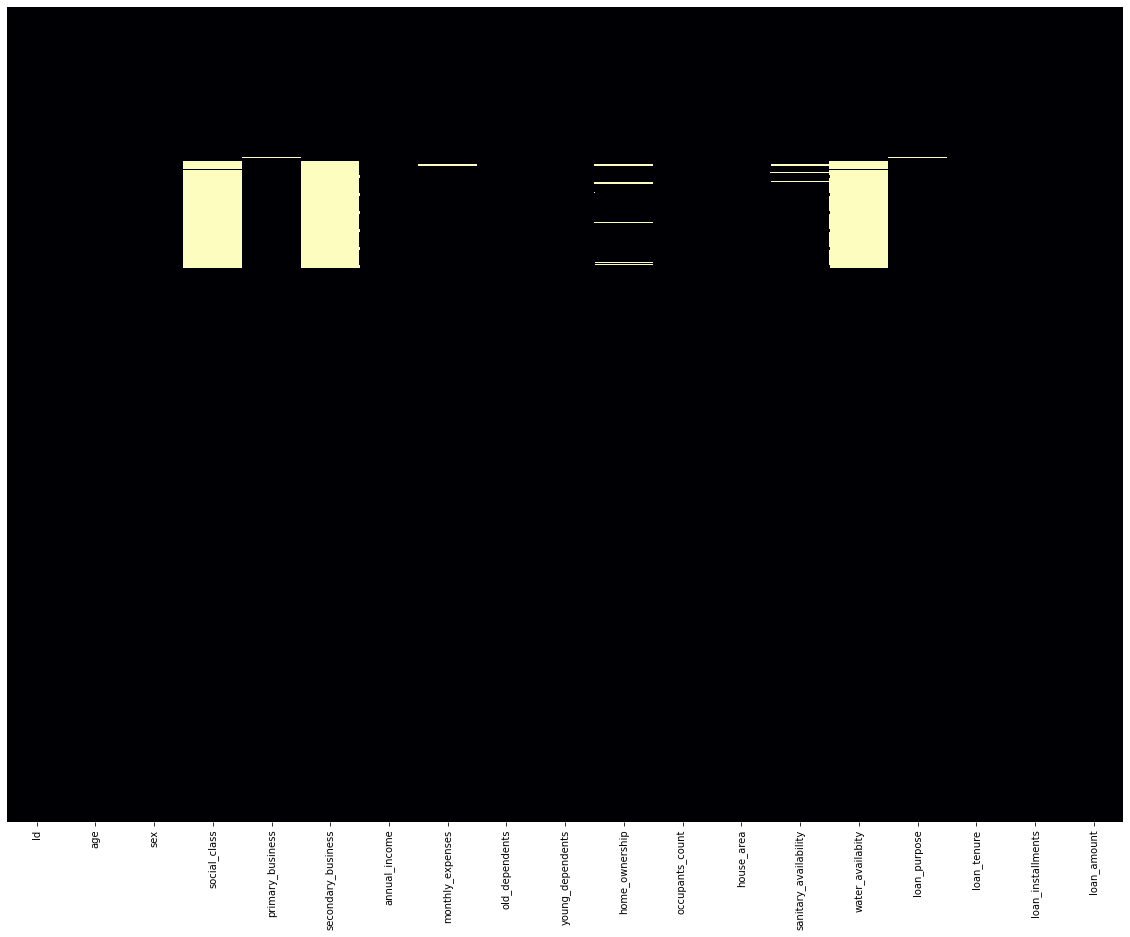

In [5]:
plt.figure(figsize=(20,15))
sns.heatmap(loan_data.isnull(), yticklabels=False, cbar=False, cmap='magma')

In [6]:
clean_data = loan_data

### Filling the missing data

In [7]:
clean_data['social_class'].value_counts().to_dict()

{'OBC': 10683,
 'SC': 3136,
 'ST': 2616,
 'General': 2299,
 'Muslim': 1743,
 'S.C': 950,
 'Minority': 892,
 'Hindu': 869,
 'GC': 807,
 'Sechudle Caste': 769,
 'G.C': 735,
 'S.C.': 529,
 'Sc': 432,
 'GEN': 413,
 'Obc': 399,
 'MUSLIM': 375,
 'NT': 373,
 'BC': 337,
 'General Caste': 290,
 'Gen': 288,
 'S.c': 244,
 'VJNT': 229,
 'GENERAL': 215,
 'Mahar': 194,
 'Open': 190,
 'Lingahitha': 180,
 'Christian': 174,
 'Ezhava': 170,
 'S.T.': 166,
 'Schudle Cast': 160,
 'sc': 154,
 'Maratha': 153,
 'S.T': 153,
 'O.B.C': 107,
 'GENL': 106,
 'Kuruba': 96,
 'O.B.C.': 90,
 'obc': 87,
 'Musilim': 86,
 'Nayaka': 84,
 'Bauddha': 84,
 'MBC': 79,
 'okkaliga': 78,
 'OPEN': 76,
 'MINORITY': 68,
 'st': 58,
 'Matang': 49,
 'Genarel': 48,
 's.c': 45,
 'O B C': 44,
 'Minority Comunity': 41,
 'UJNT': 34,
 'N.T.': 34,
 'Mushlim': 32,
 'Scheduled Caste': 31,
 'Chambhar': 31,
 'Okkaliga': 31,
 'Mynority': 31,
 'Nuniya': 30,
 's.c.': 30,
 'Mynirity': 30,
 'Shetty': 29,
 'S C': 28,
 'BCE': 28,
 'Schduled Cast': 27,
 

##### As 'social_class' is a categorical feature, we can only find out its mode i.e. 'OBC'. We will be using the mode to fill in all the null values in this feature.

In [8]:
clean_data['social_class'].mode()[0]

'OBC'

In [9]:
clean_data['social_class'].fillna(clean_data['social_class'].mode()[0], inplace=True) 

In [10]:
clean_data['social_class'].value_counts().to_dict()

{'OBC': 15938,
 'SC': 3136,
 'ST': 2616,
 'General': 2299,
 'Muslim': 1743,
 'S.C': 950,
 'Minority': 892,
 'Hindu': 869,
 'GC': 807,
 'Sechudle Caste': 769,
 'G.C': 735,
 'S.C.': 529,
 'Sc': 432,
 'GEN': 413,
 'Obc': 399,
 'MUSLIM': 375,
 'NT': 373,
 'BC': 337,
 'General Caste': 290,
 'Gen': 288,
 'S.c': 244,
 'VJNT': 229,
 'GENERAL': 215,
 'Mahar': 194,
 'Open': 190,
 'Lingahitha': 180,
 'Christian': 174,
 'Ezhava': 170,
 'S.T.': 166,
 'Schudle Cast': 160,
 'sc': 154,
 'Maratha': 153,
 'S.T': 153,
 'O.B.C': 107,
 'GENL': 106,
 'Kuruba': 96,
 'O.B.C.': 90,
 'obc': 87,
 'Musilim': 86,
 'Nayaka': 84,
 'Bauddha': 84,
 'MBC': 79,
 'okkaliga': 78,
 'OPEN': 76,
 'MINORITY': 68,
 'st': 58,
 'Matang': 49,
 'Genarel': 48,
 's.c': 45,
 'O B C': 44,
 'Minority Comunity': 41,
 'UJNT': 34,
 'N.T.': 34,
 'Mushlim': 32,
 'Scheduled Caste': 31,
 'Chambhar': 31,
 'Okkaliga': 31,
 'Mynority': 31,
 'Nuniya': 30,
 's.c.': 30,
 'Mynirity': 30,
 'Shetty': 29,
 'S C': 28,
 'BCE': 28,
 'Schduled Cast': 27,
 

##### As you can see the mode of 'social_class' i.e. 'OBC' went up from 10683 to 15938 which suggests that the missing values have all been successfully filled. 

#### -------------------------

##### Checking the central tendancies for the feature 'monthly_expenses'

###### 1. Mode

In [11]:
clean_data.monthly_expenses.mode()

0    3000.0
dtype: float64

###### 2. Median

In [12]:
clean_data.monthly_expenses.median()

3500.0

###### 3. Mean

In [13]:
clean_data.monthly_expenses.mean()

3810.8754012036106

##### As this is a numerical feature, we can use any one of the central tendancies to fill in the missing data.

In [14]:
clean_data['monthly_expenses'].fillna(clean_data['monthly_expenses'].median(), inplace=True) 

### 

##### Checking the central tendancies for the feature 'home_ownership'

In [15]:
clean_data.home_ownership.mode()[0]

1.0

In [16]:
clean_data.home_ownership.median()

1.0

In [17]:
clean_data.home_ownership.mean()

0.9724893364629869

##### As all the tendancies are almost the same, we can use any.

In [18]:
clean_data['home_ownership'].fillna(clean_data['home_ownership'].mode()[0], inplace=True) 

##### Checking the central tendancies for 'sanitary_availability' and 'water_availability'

###### 1. Mode

In [19]:
print("Sanitation: ",clean_data.sanitary_availability.mode()[0], "\n""Water: ",clean_data.water_availabity.mode()[0])

Sanitation:  1.0 
Water:  1.0


###### 2. Median

In [20]:
print("Sanitation: ",clean_data.sanitary_availability.median(), "\n""Water: ",clean_data.water_availabity.median())

Sanitation:  1.0 
Water:  1.0


###### 3. Mean

In [21]:
print("Sanitation: ",clean_data.sanitary_availability.mean(), "\n""Water: ",clean_data.water_availabity.mean())

Sanitation:  0.6863691194209891 
Water:  0.7532161049874809


In [22]:
clean_data['sanitary_availability'].fillna(clean_data['sanitary_availability'].mode()[0], inplace=True) 
clean_data['water_availabity'].fillna(clean_data['water_availabity'].mode()[0], inplace=True) 

<AxesSubplot:>

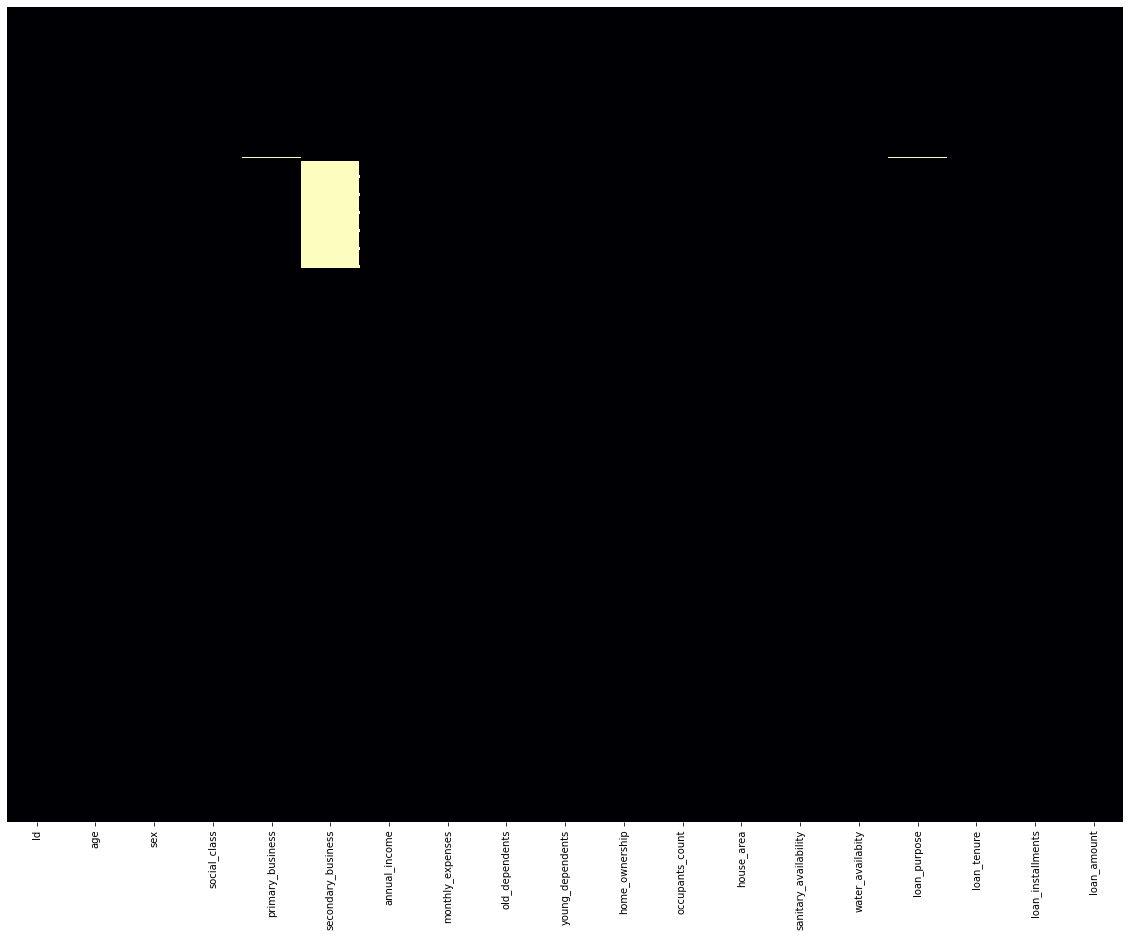

In [23]:
plt.figure(figsize=(20,15))
sns.heatmap(loan_data.isnull(), yticklabels=False, cbar=False, cmap='magma')

In [24]:
clean_data.isnull().sum()

Id                          0
age                         0
sex                         0
social_class                0
primary_business           26
secondary_business       5241
annual_income               0
monthly_expenses            0
old_dependents              0
young_dependents            0
home_ownership              0
occupants_count             0
house_area                  0
sanitary_availability       0
water_availabity            0
loan_purpose               26
loan_tenure                 0
loan_installments           0
loan_amount                 0
dtype: int64

#### We will be giving special attention to the fetaure 'secondary_business'. We might be able to save time by dropping the entire column.

In [25]:
clean_data.secondary_business.shape

(40000,)

In [26]:
clean_data.secondary_business.isnull().sum()

5241

In [27]:
clean_data.secondary_business.unique()

array(['Others', 'none', 'Agriculture', 'Daily wage labourer',
       'Livestock rearing', nan], dtype=object)

In [28]:
none_secondary_business = clean_data[clean_data['secondary_business'] == 'none']
none_secondary_business.shape

(27366, 19)

#### From the above data we can see that out of 40K rows, 32787 are either classified as 'none' or are missing. It is therefore safe to drop this coulumn.
    We are not choosing to fill the missing values in this case because we would have to fill in a lot of values.   It could possibly affect the data and therefore the model itself.

    Dropping the features: 'Id', 'secondary_business'

In [29]:
drop_columns = ['Id', 'secondary_business']
clean_data.drop(drop_columns, axis=1, inplace=True)

In [30]:
clean_data.isnull().sum()

age                       0
sex                       0
social_class              0
primary_business         26
annual_income             0
monthly_expenses          0
old_dependents            0
young_dependents          0
home_ownership            0
occupants_count           0
house_area                0
sanitary_availability     0
water_availabity          0
loan_purpose             26
loan_tenure               0
loan_installments         0
loan_amount               0
dtype: int64

###### Checking if the 26 missing values in the remaining 2 features are the same rows or not.

In [31]:
len(clean_data[(clean_data.primary_business.isna()) | (clean_data.loan_purpose.isna())])

26

In [32]:
len(clean_data[(clean_data.primary_business.isna()) & (clean_data.loan_purpose.isna())])

26

In [33]:
clean_data[(clean_data.primary_business.isna()) | (clean_data.loan_purpose.isna())]

,age,sex,social_class,primary_business,annual_income,monthly_expenses,old_dependents,young_dependents,home_ownership,occupants_count,house_area,sanitary_availability,water_availabity,loan_purpose,loan_tenure,loan_installments,loan_amount
5804,34,M,General,NaN,42000,3200.0,0,3,1.0,5,180,1.0,0.5,NaN,12,50,5000
6031,42,F,Muslim,NaN,8000,8000.0,0,0,1.0,2,240,1.0,0.5,NaN,12,12,7000
6121,44,F,GC,NaN,12000,5400.0,0,2,1.0,4,350,1.0,0.5,NaN,12,50,8000
6125,34,M,Muslim,NaN,54000,3500.0,1,2,1.0,6,1100,1.0,0.5,NaN,12,12,5000
6300,26,F,GC,NaN,9600,4000.0,0,2,1.0,4,350,1.0,0.5,NaN,12,50,5000
6462,28,F,OBC,NaN,24000,2500.0,0,1,1.0,2,600,1.0,0.5,NaN,12,12,10000
6554,27,F,Hindu,NaN,23000,4000.0,0,2,0.0,5,300,1.0,0.5,NaN,12,12,5000
7031,30,F,GC,NaN,9600,3700.0,0,2,1.0,4,250,1.0,0.5,NaN,12,50,5000
7412,32,F,GC,NaN,12000,4200.0,0,2,1.0,4,350,1.0,0.5,NaN,12,50,5000
7441,33,F,Muslim,NaN,50000,3200.0,0,4,1.0,6,600,1.0,0.5,NaN,12,12,5000


###### Dropping the null values.

In [34]:
clean_data.dropna(inplace=True)

In [35]:
clean_data.isnull().sum()

age                      0
sex                      0
social_class             0
primary_business         0
annual_income            0
monthly_expenses         0
old_dependents           0
young_dependents         0
home_ownership           0
occupants_count          0
house_area               0
sanitary_availability    0
water_availabity         0
loan_purpose             0
loan_tenure              0
loan_installments        0
loan_amount              0
dtype: int64

###### The data cleaning process is complete

### ---------------------------------

### Data Encoding

#### Finding the number of unique categories for each feature

In [38]:
clean_data.nunique()

age                       62
sex                        3
social_class             519
primary_business         441
annual_income            359
monthly_expenses         260
old_dependents             4
young_dependents           8
home_ownership             2
occupants_count           23
house_area               391
sanitary_availability      3
water_availabity           4
loan_purpose              37
loan_tenure               11
loan_installments         21
loan_amount              115
dtype: int64

#### 

### Count Frequency Data Encoding

    In frquency encoding, the number of times a category of a feature is occuring is calculated and that category itself is replaced by that number. 

##### Using this particular encoding technique in all the features with high cardinality.
    1. Social Class
    2. Primary Business
    3. Loan Purpose

In [63]:
print("Social Class:",clean_data.social_class.nunique(),"\n""Primary Business:", clean_data.primary_business.nunique(),"\n" "Loan Purpose:", clean_data.loan_purpose.nunique())

Social Class: 519 
Primary Business: 441 
Loan Purpose: 37


In [64]:
social_frequency_map = clean_data.social_class.value_counts().to_dict()
social_frequency_map

{'OBC': 15933,
 'SC': 3133,
 'ST': 2616,
 'General': 2295,
 'Muslim': 1739,
 'S.C': 949,
 'Minority': 892,
 'Hindu': 868,
 'GC': 801,
 'Sechudle Caste': 769,
 'G.C': 735,
 'S.C.': 529,
 'Sc': 432,
 'GEN': 413,
 'Obc': 399,
 'MUSLIM': 375,
 'NT': 373,
 'BC': 337,
 'General Caste': 290,
 'Gen': 288,
 'S.c': 244,
 'VJNT': 229,
 'GENERAL': 214,
 'Mahar': 194,
 'Open': 190,
 'Lingahitha': 180,
 'Christian': 174,
 'Ezhava': 170,
 'S.T.': 166,
 'Schudle Cast': 160,
 'sc': 154,
 'Maratha': 153,
 'S.T': 153,
 'O.B.C': 107,
 'GENL': 106,
 'Kuruba': 96,
 'O.B.C.': 90,
 'obc': 87,
 'Musilim': 86,
 'Nayaka': 84,
 'Bauddha': 84,
 'MBC': 79,
 'okkaliga': 78,
 'OPEN': 76,
 'MINORITY': 68,
 'st': 58,
 'Matang': 49,
 'Genarel': 48,
 's.c': 45,
 'O B C': 44,
 'Minority Comunity': 41,
 'UJNT': 34,
 'N.T.': 34,
 'Mushlim': 32,
 'Scheduled Caste': 31,
 'Chambhar': 31,
 'Okkaliga': 31,
 'Mynority': 31,
 'Nuniya': 30,
 's.c.': 30,
 'Mynirity': 30,
 'Shetty': 29,
 'S C': 28,
 'BCE': 28,
 'Schduled Cast': 27,
 

In [65]:
primary_business_frequency_map = clean_data.primary_business.value_counts().to_dict()
primary_business_frequency_map

{'Tailoring': 3971,
 'Goat rearing': 2268,
 'Cow Rearing': 2077,
 'Handloom Work': 2068,
 'Vegetable cultivation': 1704,
 'Grocery store': 1369,
 'School': 1332,
 'Milk business': 1310,
 'Vegetable vendor': 1174,
 'Weaver': 1157,
 'Saree business': 1000,
 'Embroidery work': 942,
 'Fish rearing': 735,
 'Poultry farm': 726,
 'Rice business': 678,
 'General store': 661,
 'Cloth business': 609,
 'Paddy cultivation': 594,
 'Education Loan': 557,
 'Buffalo rearing': 500,
 'Beedi rolling business': 479,
 'Gram cultivation': 416,
 'Paddy processing': 402,
 'Cattle rearing': 346,
 'Thread making': 338,
 'Petty shop': 331,
 'Betel shop': 326,
 'Tea stall': 320,
 'Fruits business': 314,
 'Cash crops': 311,
 'Tiffin center': 302,
 'Snacks business': 281,
 'Mess Work': 280,
 'Wet grinding': 257,
 'Readymade Garments': 250,
 'Bangles business': 243,
 'Artificial Flower Making': 238,
 'Carpenter/Wood business': 224,
 'Artificial Jewellery Business': 221,
 'Fish vendor': 211,
 'Basket making business'

In [66]:
loan_purpose_frequency_map = clean_data.loan_purpose.value_counts().to_dict()
loan_purpose_frequency_map

{'Apparels': 7064,
 'Agro Based Businesses': 4729,
 'Animal husbandry': 4421,
 'Meat Businesses': 4302,
 'Handicrafts': 4230,
 'Farming/ Agriculture': 3284,
 'Education Loan': 2100,
 'Retail Store': 1963,
 'Eateries': 1831,
 'Business Services - II': 854,
 'Tobacco Related Activities': 853,
 'Construction Related Activities': 661,
 'Retail Sale': 614,
 'Artifical Jewellry Selling': 556,
 'Carpentery work': 299,
 'Food Items': 285,
 'Business Services - I': 276,
 'Transportation Services': 245,
 'Flower Business': 238,
 'Beauty Salon': 204,
 'Repair Services': 192,
 'Laundry Services': 162,
 'Agarbatti Business': 107,
 'Utensil Selling': 104,
 'Sanitation': 101,
 'Recycling/ Waste Management': 100,
 'Others': 62,
 'Vocational Loans': 40,
 'Jewellry Shop': 30,
 'Training': 23,
 'Miscellaneous': 19,
 'Cyber Caf_': 7,
 'Tent Services': 6,
 'Cable TV Services': 5,
 'Tuition Centre': 3,
 'Professional': 3,
 'Manufacturing': 1}

In [67]:
clean_data.social_class = clean_data.social_class.map(social_frequency_map)
clean_data.primary_business = clean_data.primary_business.map(primary_business_frequency_map)
clean_data.loan_purpose = clean_data.loan_purpose.map(loan_purpose_frequency_map)
clean_data.head()

,age,sex,social_class,primary_business,annual_income,monthly_expenses,old_dependents,young_dependents,home_ownership,occupants_count,house_area,sanitary_availability,water_availabity,loan_purpose,loan_tenure,loan_installments,loan_amount
0,22,F,11,3971,36000,5000.0,0,2,1.0,4,70,1.0,0.5,7064,12,12,5000
1,21,F,15933,3971,94000,3600.0,1,1,1.0,4,80,1.0,0.5,7064,12,50,7500
2,24,M,5,81,48000,4000.0,0,2,1.0,4,50,1.0,0.5,204,12,12,5000
3,26,F,15933,3971,7000,5000.0,0,2,1.0,5,50,1.0,0.5,7064,12,50,7500
4,23,F,15933,661,36000,3500.0,0,0,1.0,1,112,1.0,0.5,1963,12,12,5000


    Last remaininng feature to be encoded is the 'Gender'. Ordinal encoding cannot be used as it will create rankings according to our will. One hot encoding will be used instead.

###### Checking for unique values of 'Gender'

In [68]:
clean_data.sex.unique()

array(['F', 'M', 'TG'], dtype=object)

In [69]:
clean_data[clean_data['sex'] == 'TG']

,age,sex,social_class,primary_business,annual_income,monthly_expenses,old_dependents,young_dependents,home_ownership,occupants_count,house_area,sanitary_availability,water_availabity,loan_purpose,loan_tenure,loan_installments,loan_amount
6157,26,TG,801,726,14400,4100.0,0,2,1.0,4,300,1.0,0.5,4302,12,50,8000
7034,22,TG,801,942,12000,4300.0,0,1,1.0,3,300,1.0,0.5,4230,12,50,5000
24358,21,TG,2616,735,60000,4200.0,0,2,1.0,4,900,1.0,1.0,4302,12,12,5000
29899,38,TG,1739,211,50000,3500.0,0,3,1.0,6,120,0.0,1.0,4302,12,12,12000
34763,41,TG,1,1,108000,6000.0,0,1,1.0,2,500000,1.0,0.5,1963,12,12,8000
38203,19,TG,21,557,36000,4000.0,0,0,1.0,3,900,1.0,1.0,2100,12,2,10000
38794,20,TG,15933,2077,52000,2000.0,0,1,1.0,3,600,1.0,1.0,4421,12,12,15000


In [70]:
final_data = pd.get_dummies(clean_data, columns = ['sex'])
final_data

,age,social_class,primary_business,annual_income,monthly_expenses,old_dependents,young_dependents,home_ownership,occupants_count,house_area,sanitary_availability,water_availabity,loan_purpose,loan_tenure,loan_installments,loan_amount,sex_F,sex_M,sex_TG
0,22,11,3971,36000,5000.0,0,2,1.0,4,70,1.0,0.5,7064,12,12,5000,1,0,0
1,21,15933,3971,94000,3600.0,1,1,1.0,4,80,1.0,0.5,7064,12,50,7500,1,0,0
2,24,5,81,48000,4000.0,0,2,1.0,4,50,1.0,0.5,204,12,12,5000,0,1,0
3,26,15933,3971,7000,5000.0,0,2,1.0,5,50,1.0,0.5,7064,12,50,7500,1,0,0
4,23,15933,661,36000,3500.0,0,0,1.0,1,112,1.0,0.5,1963,12,12,5000,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,45,1739,500,78000,4000.0,0,0,1.0,2,600,1.0,1.0,4421,12,12,8000,1,0,0
39996,35,2616,3971,48000,4000.0,0,3,1.0,4,800,1.0,1.0,7064,12,12,8000,1,0,0
39997,35,432,2268,48000,3500.0,0,2,1.0,3,600,1.0,1.0,4302,12,12,8000,1,0,0
39998,28,432,2268,48000,4000.0,0,3,1.0,4,600,1.0,1.0,4302,12,12,8000,1,0,0


### Outlier Detection

#### Boxplot - Loan amount

<AxesSubplot:ylabel='loan_amount'>

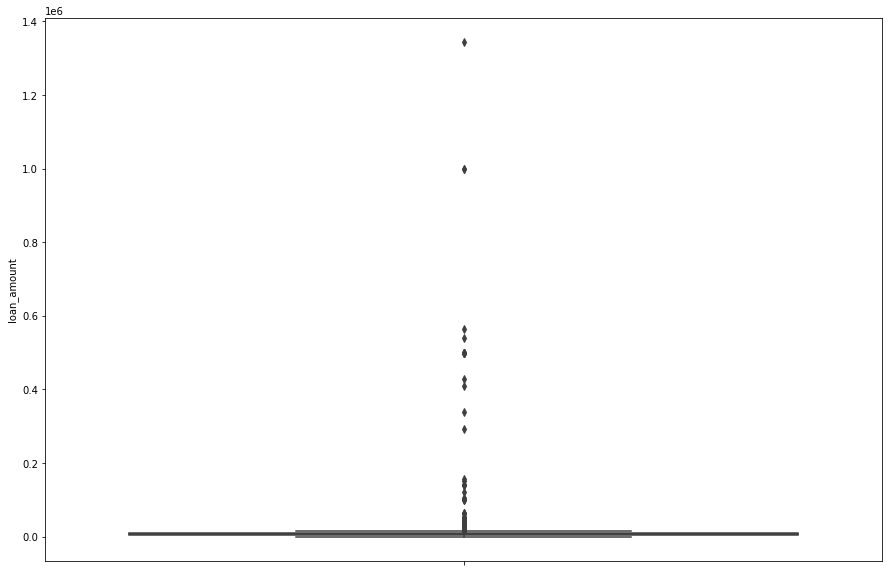

In [122]:
plt.figure(figsize=(15,10))
sns.boxplot(y=clean_data.loan_amount)

#### InterQuartile - Loan amount

In [120]:
Quartile1 = np.percentile(clean_data['loan_amount'], 25, interpolation = 'midpoint') 
Quartile2 = np.percentile(clean_data['loan_amount'], 50, interpolation = 'midpoint') 
Quartile3 = np.percentile(clean_data['loan_amount'], 75, interpolation = 'midpoint') 
  
print('Q1 25 percentile of the given data is, ', Quartile1)
print('Q1 50 percentile of the given data is, ', Quartile2)
print('Q1 75 percentile of the given data is, ', Quartile3)
  
IQR_loan = Quartile3 - Quartile1 
print('Interquartile range is', IQR_loan)

Q1 25 percentile of the given data is,  5000.0
Q1 50 percentile of the given data is,  8000.0
Q1 75 percentile of the given data is,  10000.0
Interquartile range is 5000.0


In [126]:
lower_limit = Quartile1 - 1.5 * IQR_loan
upper_limit = Quartile3 + 1.5 * IQR_loan
print('Lower limit is', lower_limit)
print('Upper limit is', upper_limit)

Lower limit is -2500.0
Upper limit is 17500.0


In [125]:
outlier_loan = []
for i in clean_data['loan_amount']:
    if (( i > upper_limit ) or ( i < lower_limit )):
         outlier_loan.append(i)
print(' Outliers in Loan amount are: ', "\n",outlier_loan)

 Outliers in Loan amount are:  
 [19000, 19000, 19000, 19000, 19000, 19000, 30000, 19000, 19000, 19000, 19000, 62000, 63000, 63000, 31000, 34000, 19000, 50000, 50000, 140000, 105000, 140000, 140000, 140000, 20000, 20000, 20000, 20000, 20000, 20000, 20000, 20000, 20000, 20000, 20000, 20000, 35000, 35000, 35000, 35000, 35000, 35000, 35000, 100000, 18000, 30000, 30000, 30000, 30000, 30000, 20000, 30000, 30000, 50000, 50000, 19000, 500000, 500000, 18000, 1000000, 500000, 563000, 500000, 500000, 40000, 40000, 41200, 408800, 40000, 30000, 340000, 540000, 30000, 40000, 30000, 50000, 40000, 500000, 30000, 19000, 20000, 150000, 1000000, 20000, 20000, 20000, 20000, 20000, 20000, 100000, 50000, 50000, 50000, 50000, 50000, 40000, 40000, 40000, 20000, 20000, 20000, 20000, 20000, 500000, 18000, 20000, 20000, 20000, 20000, 20000, 20000, 20000, 20000, 20000, 20000, 20000, 20000, 20000, 20000, 20000, 20000, 20000, 20000, 20000, 20000, 20000, 20000, 120000, 40000, 20000, 20000, 50000, 50000, 20000, 5000

#### Boxplot - Annual Income

<AxesSubplot:ylabel='annual_income'>

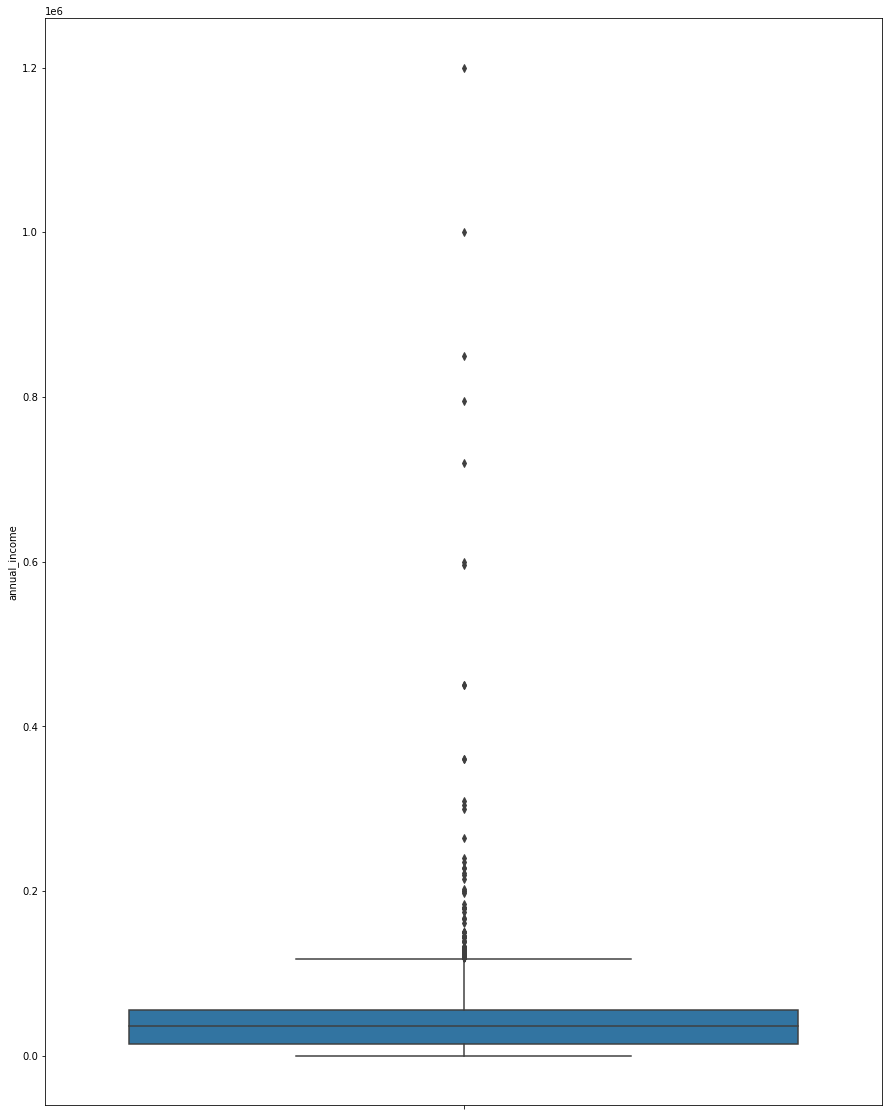

In [45]:
plt.figure(figsize=(15,20))
sns.boxplot(y=clean_data.annual_income)

##### InterQuartile - Annual Income

In [128]:
Q1 = np.percentile(clean_data['annual_income'], 25, interpolation = 'midpoint') 
Q2 = np.percentile(clean_data['annual_income'], 50, interpolation = 'midpoint') 
Q3 = np.percentile(clean_data['annual_income'], 75, interpolation = 'midpoint') 
  
print('Q1 25 percentile of the given data is, ', Q1)
print('Q1 50 percentile of the given data is, ', Q2)
print('Q1 75 percentile of the given data is, ', Q3)
  
IQR = Q3 - Q1 
print('Interquartile range is', IQR)

Q1 25 percentile of the given data is,  14400.0
Q1 50 percentile of the given data is,  36000.0
Q1 75 percentile of the given data is,  56000.0
Interquartile range is 41600.0


In [129]:
low_lim = Q1 - 1.5 * IQR
up_lim = Q3 + 1.5 * IQR
print('low_limit is', low_lim)
print('up_limit is', up_lim)

low_limit is -48000.0
up_limit is 118400.0


In [130]:
outlier =[]
for i in clean_data['annual_income']:
    if (( i > up_lim ) or ( i < low_lim )):
         outlier.append(i)
print('Outliers in Annual income are: '"\n", outlier)

Outliers in Annual income are: 
 [165600, 120000, 120000, 120000, 144000, 120000, 120000, 120000, 120000, 120000, 200000, 120000, 150000, 180000, 120000, 150000, 120000, 200000, 120000, 144000, 120000, 144000, 120000, 120000, 120000, 120000, 120000, 120000, 120000, 120000, 120000, 120000, 120000, 120000, 120000, 120000, 120000, 120000, 120000, 120000, 144000, 140000, 120000, 120000, 120000, 120000, 120000, 120000, 120000, 120000, 120000, 1200000, 120000, 138000, 120000, 180000, 360000, 120000, 120000, 600000, 120000, 168000, 120000, 795134, 120000, 120000, 120000, 120000, 120000, 120000, 720000, 596000, 120000, 240000, 120000, 120000, 360000, 120000, 1000000, 120000, 120000, 120000, 120000, 120000, 120000, 150000, 120000, 126000, 120000, 120000, 120000, 120000, 120000, 119000, 120000, 120000, 120000, 120000, 120000, 124000, 124000, 120000, 120000, 120000, 120000, 120000, 120000, 120000, 120000, 120000, 120000, 120000, 120000, 120000, 126000, 120000, 126000, 120000, 120000, 120000, 1200

In [55]:
len(clean_data['annual_income'])

39974

In [54]:
len(outlier)

365

### ---------------------------------

### Correlation Matrix

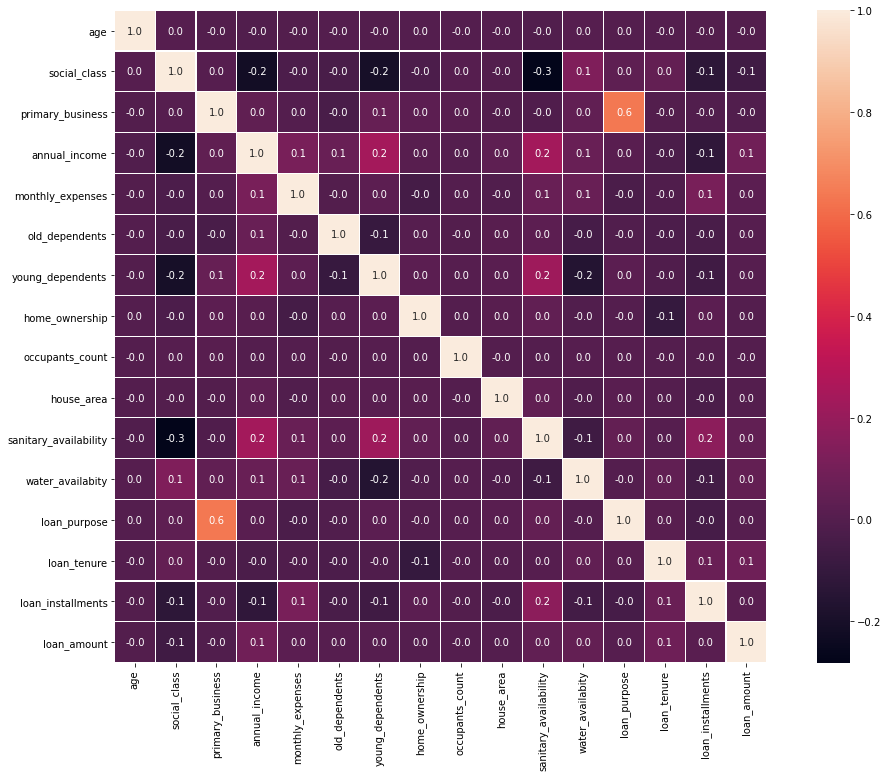

In [132]:
x = clean_data 
f, ax = plt.subplots(figsize=(18, 12))
sns.heatmap(x.corr(), annot=True, annot_kws={"size":10}, linewidths=0.1, fmt='.1f', ax = ax, square=True );

### ---------------------------------------------------------------------------------------------------

### Splitting data into Training and Testing

In [133]:
final_data.columns

Index(['age', 'social_class', 'primary_business', 'annual_income',
       'monthly_expenses', 'old_dependents', 'young_dependents',
       'home_ownership', 'occupants_count', 'house_area',
       'sanitary_availability', 'water_availabity', 'loan_purpose',
       'loan_tenure', 'loan_installments', 'loan_amount', 'sex_F', 'sex_M',
       'sex_TG'],
      dtype='object')

In [134]:
X = final_data.drop('loan_amount', axis=1)
y = final_data['loan_amount']

In [135]:
X = X.values
y = y.values

In [136]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

### ---------------------------------

In [141]:
from sklearn.metrics import accuracy_score

### Linear Regression

In [83]:
#Fitting the model on training data
from sklearn.linear_model import LinearRegression
linearRegressor = LinearRegression()
linearRegressor.fit(X_train, y_train)


LinearRegression()

In [84]:
linearRegressor.score(X_train, y_train)*100

2.0248824402260057

In [85]:
#Fitting the model on testing data
linearRegressor.fit(X_test, y_test)

LinearRegression()

In [86]:
linearRegressor.score(X_test, y_test)*100

2.278892439409941

### ---------------------------------

### Support Vector Regressor

In [137]:
from sklearn import svm
svr = svm.SVR()

In [138]:
svr.fit(X_train, y_train)

SVR()

In [139]:
y_pred_svr = svr.predict(X_train)
y_pred_svr

array([8072.44443898, 7629.36617765, 7189.81359821, ..., 7783.34133165,
       7950.16352165, 8000.76932904])

In [140]:
svr.score(X_train, y_train)*100

0.2742348396788885

In [145]:
svr.fit(X_test, y_test)

SVR()

In [147]:
y_pred_svr_test = svr.predict(X_test)
y_pred_svr_test

array([7568.26811407, 7791.93133487, 6941.35233565, ..., 7526.85278069,
       7335.46259985, 8013.33341703])

In [148]:
svr.score(X_test, y_test)*100

0.2078621746646303

### ---------------------------------

### Decision Tree Regressor

In [87]:
#Fitting the model on training data
from sklearn.tree import DecisionTreeRegressor 
decisionTree = DecisionTreeRegressor(random_state = 0) 

In [88]:
# fit the model with X and Y data
decisionTree.fit(X_train, y_train)

DecisionTreeRegressor(random_state=0)

In [89]:
# predicting a new value
y_pred_dt = decisionTree.predict(X_train)

In [90]:
decisionTree.score(X_train, y_train)*100

99.96420907799765

In [91]:
decisionTree.fit(X_test, y_test)

DecisionTreeRegressor(random_state=0)

In [92]:
y_pred_dt = decisionTree.predict(X_test)

In [93]:
decisionTree.score(X_test, y_test)*100

99.98141257783746

### Bagging using Decision Tree

In [97]:
from sklearn.ensemble import BaggingRegressor
from sklearn.datasets import make_regression
X, y = make_regression(n_samples=100, n_features=4,
                       n_informative=2, n_targets=1,
                       random_state=0, shuffle=False)
bagReg = BaggingRegressor(base_estimator=DecisionTreeRegressor(),
                        n_estimators=10, random_state=0).fit(X_train, y_train)
y_predict_train = bagReg.predict(X_train)
y_predict_train

array([11925., 10000., 10200., ..., 10000.,  6300.,  9500.])

In [98]:
bagReg.score(X_train, y_train)*100

83.9800780993603

In [99]:
bagReg = BaggingRegressor(base_estimator=DecisionTreeRegressor(),
                        n_estimators=10, random_state=0).fit(X_test, y_test)
y_pred_test = bagReg.predict(X_test)
y_pred_test

array([ 5500.,  5900.,  5000., ...,  5300.,  9800., 13000.])

In [100]:
bagReg.score(X_test, y_test)*100

94.51291545971138

### ---------------------------------

### Random Forest Regressor

In [101]:
from sklearn.ensemble import RandomForestRegressor
rfregressor = RandomForestRegressor(n_estimators = 100, random_state = 0)
rfregressor.fit(X_train, y_train) 
y_pred_rf = rfregressor.predict(X_train)

In [102]:
rfregressor.score(X_train, y_train)*100

91.73626671884311

In [104]:
rfregressor.fit(X_test, y_test)
y_pred_rftest = rfregressor.predict(X_train)
y_pred_rftest

array([10490.,  9909.,  9980., ...,  9853.,  6836.,  8410.])

In [105]:
rfregressor.score(X_test, y_test)*100

88.03448106236401

### ---------------------------------

### XGBoost

In [102]:
import xgboost as xgb
xgbr = xgb.XGBRegressor(verbosity=0) 

In [74]:
xgbr.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=4,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=0)

In [75]:
xgbr.score(X_train, y_train)*100

98.28336555390945

In [76]:
xgbr.fit(X_test, y_test)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=4,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=0)

In [77]:
xgbr.score(X_test, y_test)*100

98.76087658883701

### ---------------------------------

### Ensemble using Stacking

>rfr -6.904 (1.930)
>cart -10.087 (2.758)
>linear -0.000 (0.000)


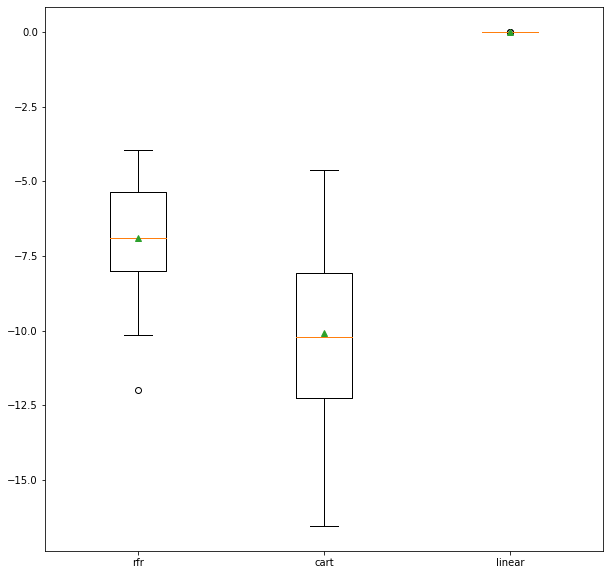

In [109]:
from numpy import mean
from numpy import std
from sklearn.datasets import make_regression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from matplotlib import pyplot

# Models to be used
def get_models():
    models = dict()
    models['rfr'] = RandomForestRegressor()
    models['cart'] = DecisionTreeRegressor()
    models['linear'] = LinearRegression()
    return models

#  Cross Validation
def evaluate_model(model, X, y):
    cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
    return scores

models = get_models()
results = list()
names = list()

for name, model in models.items():
    scores = evaluate_model(model, X, y)
    results.append(scores)
    names.append(name)
    print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))

plt.figure(figsize=(10,10))
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

In [110]:
# get a stacking ensemble of models
def get_stacking():
    # base models
    level0 = list()
    level0.append(('rfr', RandomForestRegressor()))
    level0.append(('cart', DecisionTreeRegressor()))
    level0.append(('linear', LinearRegression()))
    # meta learner model
    level1 = SVR()
    # stacking ensemble
    model = StackingRegressor(estimators=level0, final_estimator=level1, cv=5)
    return model

In [111]:
# get a list of models to evaluate
def get_models():
    models = dict()
    models['rfr'] = RandomForestRegressor()
    models['cart'] = DecisionTreeRegressor()
    models['linear'] = LinearRegression()
    models['stacking'] = get_stacking()
    return models

>rfr -6.856 (1.847)
>cart -10.080 (2.839)
>linear -0.000 (0.000)
>stacking -17.327 (5.830)


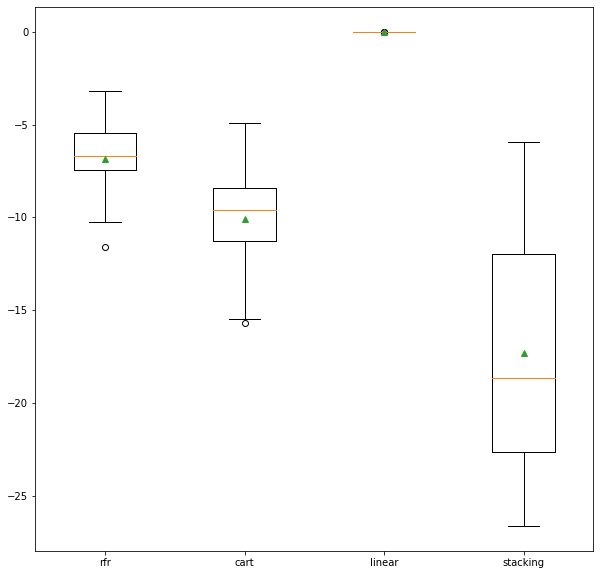

In [113]:
# compare ensemble to each standalone models for regression
from numpy import mean
from numpy import std
from sklearn.datasets import make_regression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import StackingRegressor
from matplotlib import pyplot

# stacking ensemble of models
def get_stacking():
    # base models
    level0 = list()
    level0.append(('rfr', RandomForestRegressor()))
    level0.append(('cart', DecisionTreeRegressor()))
    level0.append(('linear', LinearRegression()))
    # meta learner model
    level1 = SVR()
    # stacking ensemble
    model = StackingRegressor(estimators=level0, final_estimator=level1, cv=5)
    return model

# get a list of models to evaluate
def get_models():
    models = dict()
    models['rfr'] = RandomForestRegressor()
    models['cart'] = DecisionTreeRegressor()
    models['linear'] = LinearRegression()
    models['stacking'] = get_stacking()
    return models

# Cross Validation
def evaluate_model(model, X, y):
    cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
    return scores

models = get_models()

results = list()
names = list()
    
for name, model in models.items():
    scores = evaluate_model(model, X, y)
    results.append(scores)
    names.append(name)
    print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
    
plt.figure(figsize=(10,10))
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

##### 

### Ensemble 2

>knn -10.749 (2.637)
>cart -9.806 (2.790)
>rfr -6.965 (2.085)
>svm -26.601 (5.895)


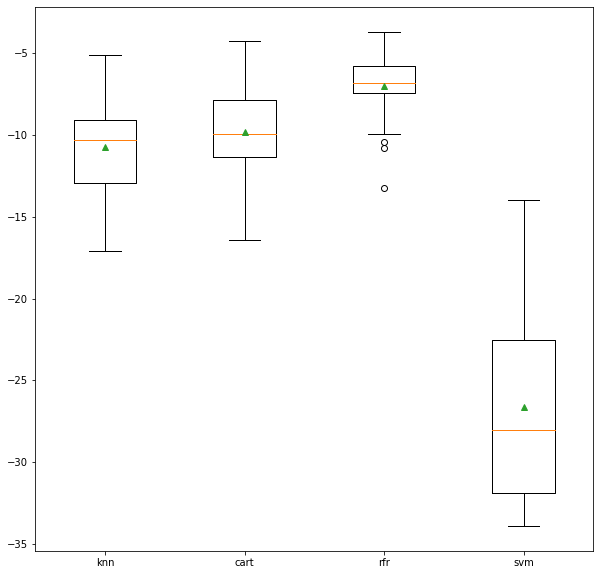

In [114]:
# compare machine learning models for regression
from numpy import mean
from numpy import std
from sklearn.datasets import make_regression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

# Models
def get_models():
    models = dict()
    models['knn'] = KNeighborsRegressor()
    models['cart'] = DecisionTreeRegressor()
    models['rfr'] = RandomForestRegressor()
    models['svm'] = SVR()
    return models

# Cross Validation
def evaluate_model(model, X, y):
    cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
    return scores

models = get_models()
results = list()
names = list()

for name, model in models.items():
    scores = evaluate_model(model, X, y)
    results.append(scores)
    names.append(name)
    print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))

plt.figure(figsize=(10,10))
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

In [115]:
# get a stacking ensemble of models
def get_stacking():
    # base models
    level0 = list()
    level0.append(('knn', KNeighborsRegressor()))
    level0.append(('cart', DecisionTreeRegressor()))

    level0.append(('svm', SVR()))
    # meta learner model
    level1 = LinearRegression()
    # stacking ensemble
    model = StackingRegressor(estimators=level0, final_estimator=level1, cv=5)
    return model

In [118]:
# get a list of models to evaluate
def get_models():
    models = dict()
    models['knn'] = KNeighborsRegressor()
    models['cart'] = DecisionTreeRegressor()
    models['svm'] = SVR()
    models['stacking'] = get_stacking()
    return models

>knn -10.749 (2.637)
>cart -10.253 (2.820)
>svm -26.601 (5.895)
>stacking -7.962 (1.872)


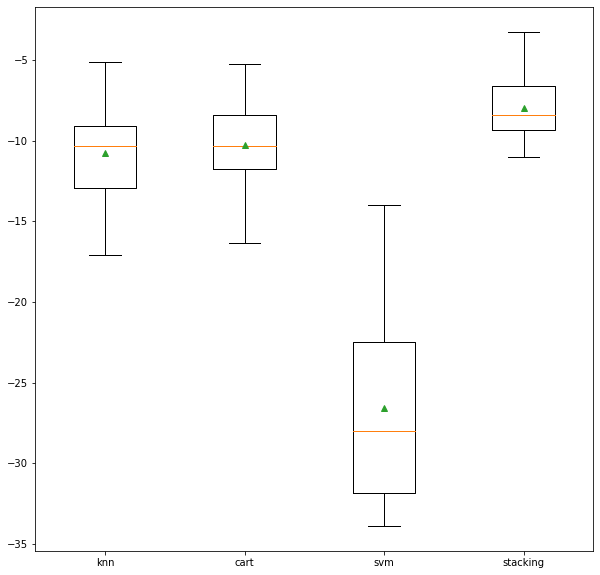

In [119]:
# compare ensemble to each standalone models for regression
from numpy import mean
from numpy import std
from sklearn.datasets import make_regression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import StackingRegressor
from matplotlib import pyplot


# Stacking ensemble of models
def get_stacking():
    # Base models
    level0 = list()
    level0.append(('knn', KNeighborsRegressor()))
    level0.append(('cart', DecisionTreeRegressor()))
    level0.append(('svm', SVR()))
    # Meta learner model
    level1 = LinearRegression()
    # Stacking ensemble
    model = StackingRegressor(estimators=level0, final_estimator=level1, cv=5)
    return model

# Models
def get_models():
    models = dict()
    models['knn'] = KNeighborsRegressor()
    models['cart'] = DecisionTreeRegressor()
    models['svm'] = SVR()
    models['stacking'] = get_stacking()
    return models

# Cross Validation
def evaluate_model(model, X, y):
    cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
    return scores

models = get_models()

results = list()
names = list()

for name, model in models.items():
    scores = evaluate_model(model, X, y)
    results.append(scores)
    names.append(name)
    print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
    
plt.figure(figsize=(10,10))
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()